# Beispiel mit Boston Dataset

In [128]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [129]:
dataset = load_boston()

In [130]:
class SimpleLinearRegression:
    def __init__(self):
    # Modellparameter bzw. Gewichte w:
    # Den Gewichten wurde in diesem Fall richtige Namen gegeben
        self.coef_: np.ndarray = None
        self.intercept_: np.ndarray = None

    def _compute_coef(self, x: np.ndarray, y: np.ndarray):
        # Bei der linearen Regression geht es um die ordinary least square Methode
        # Hier werden einfach nur die Formeln aus der Doku programmiert
        x_mean = np.mean(x, axis = 0) # 2D-Array --> axis = 0 berechnet den Mittelwert für jedes Feature/"jede Spalte"
        y_mean = np.mean(y, axis = 0)
        #numerator = np.sum([(x[i] - x_mean) * (y[i] - y_mean) for i in range(len(x))])
        numerator = np.sum((x - x_mean) * (y - y_mean)) # Gleiches Ergebnis, wie mit List-Comprehension
        denumerator = np.sum((x - x_mean)**2)
        self.coef_ = numerator/denumerator

    def _compute_intercept(self, x: np.ndarray, y: np.ndarray):
        x_mean = np.mean(x, axis = 0) 
        y_mean = np.mean(y, axis = 0)
        self.intercept_ = y_mean - self.coef_ * x_mean
    
    def fit(self, x: np.ndarray, y: np.ndarray): # In Supervised Algorithmen gibt man sowohl x und y mit
        self._compute_coef(x, y)
        self._compute_intercept(x, y)

    def predict(self, x: np.ndarray):
        # y = m * x + b bzw. hier y = coef_ * i + intercept_
        # y_pred = np.array([np.dot(self.coef_.T, x[i] + self.intercept_) for i in range(len(x))])
        # np.dot wird gebraucht, falls wir ein Problem mit 2 Features hätten. Dann wäre coef eben auch 2D.
        return (self.coef_ * x + self.intercept_)# So nur, falls es wirklich nur ein einzelnes Feature gibt

    def score(self, x: np.ndarray, y: np.ndarray): # R²
        y_mean = np.mean(y, axis = 0)
        y_pred = self.predict(x)
        numerator = np.sum((y - y_pred)**2)
        denumerator = np.sum((y - y_mean)**2)
        return (1 - (numerator/denumerator))

    


In [131]:
x = dataset.data[:, 5] # Nur das fünfte Feature nutzen (als Beispiel)
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [132]:
regr = SimpleLinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
r2_own = regr.score(x_test, y_test)
r2_sklearn = r2_score(y_test, y_pred)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2_own: {r2_own} # Entspricht nicht etwa einem Prozentwert, kann aber Werte [0 1]] annehmen")
print(f"R2_sklearn: {r2_sklearn}")

Coef: 9.118102197303783
Intercept: -34.66230743840676
R2: 0.4584649934303069 # Entspricht nicht etwa einem Prozentwert, kann aber Werte [0 1]] annehmen
R2: 0.4584649934303069


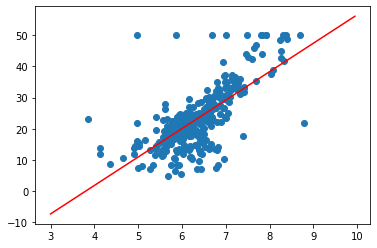

In [133]:
x_arange = np.arange(start = 3.0, stop = 10.0, step = 0.05)
y_arange = regr.predict(x_arange)

plt.scatter(x_train, y_train)
plt.plot(x_arange, y_arange, color = "red")
plt.show()